# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [3]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [4]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [16]:
def P1(num_examples=5):
    ### STUDENT START ###
     for i in range(num_examples):
        #print the message number
        print(f'Message {i+1}:')
        #print the label of the message
        print(f"Label: {newsgroups_train.target_names[train_labels[i]]}")
        #print the message
        print(train_data[i])
        print('\n')
        
   
    ### STUDENT END ###
    
    
P1(5)

Message 1:
Label: comp.graphics
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Message 2:
Label: talk.religion.misc


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for c

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [343]:
def P2():
        ### STUDENT START ###
        #instantiate Count Vectorizer

    # vectorizer.fit(train_data)


    #vectorize frequency of each word in our dataset for each example
    #Part1
    vectorizer = CountVectorizer()
    a = vectorizer.fit_transform(train_data)
    print(f"Part 1 \n")
    print(f"The size of the vocabulary is {a.shape[1] :,.0f} words")
    print(f"The average number of non-zero features per example is {a.nnz/a.shape[0]}")
    print(f"The fraction of non-zero entries in the matrix is {a.nnz / (a.shape[0] * a.shape[1])}")
    print(f"The 0th feature string is: {vectorizer.get_feature_names()[0]}")
    print(f"The last feature string is: {vectorizer.get_feature_names()[-1]}")

    #Part2

    own_words = ["atheism", "graphics", "space", "religion"]
    print(f"\nPart 2 \n")
    vectorizer2 = CountVectorizer(vocabulary = own_words)
    b = vectorizer2.transform(train_data)
    print(f"Confirming the feature list: {vectorizer2.get_feature_names()} and the length of size of the vocabulary is {b.shape[1]}.")
    print(f"The average number of non-zero features per example is {b.nnz/b.shape[0]}")


    #Part 3

    vectorizer3 = CountVectorizer(ngram_range = (2,3), analyzer = 'char')
    c = vectorizer3.fit_transform(train_data)
    print (f"\nPart 3 \n")
    print(f"The size of the vocabulary is {c.shape[1] :,.0f}")


    #Part 4
    print(f"\nPart 4 \n")
    vectorize4 = CountVectorizer( min_df = 10)
    d = vectorize4.fit_transform(train_data)
    print(f"The size of the vocabulary is {d.shape[1] :,.0f}")
      


     #Part 5
    print(f"\nPart 5 \n")
    vectorize5 = CountVectorizer()
    e = vectorize5.fit_transform(train_data)
    print(f"The size of the vocabulary of the train_data is is {e.shape[1] :,.0f}")

    vectorize6 = CountVectorizer()
    f = vectorize6.fit_transform(dev_data)
    print(f"The size of the vocabulary of the dev data is {f.shape[1] :,.0f}")
    fracmissing = 1 - sum(np.in1d(np.array(vectorize6.get_feature_names()), np.array(vectorize5.get_feature_names())))/f.shape[1]
    print(f"""The fraction of words in the development vocabulary that is missing from the training vocabulary is {fracmissing :.2%}""")
  ### STUDENT END ###

P2()

Part 1 

The size of the vocabulary is 26,879 words
The average number of non-zero features per example is 96.70599803343165
The fraction of non-zero entries in the matrix is 0.0035978272269590263
The 0th feature string is: 00
The last feature string is: zyxel

Part 2 

Confirming the feature list: ['atheism', 'graphics', 'space', 'religion'] and the length of size of the vocabulary is 4.
The average number of non-zero features per example is 0.26843657817109146

Part 3 

The size of the vocabulary is 35,478

Part 4 

The size of the vocabulary is 3,064

Part 5 

The size of the vocabulary of the train_data is is 26,879
The size of the vocabulary of the dev data is 16,246
The fraction of words in the development vocabulary that is missing from the training vocabulary is 24.79%


### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score. For each model, show the C value, f1 score, and sum of squared weights for each topic.

F1 Scores for Various K Nearest Neighbors Models


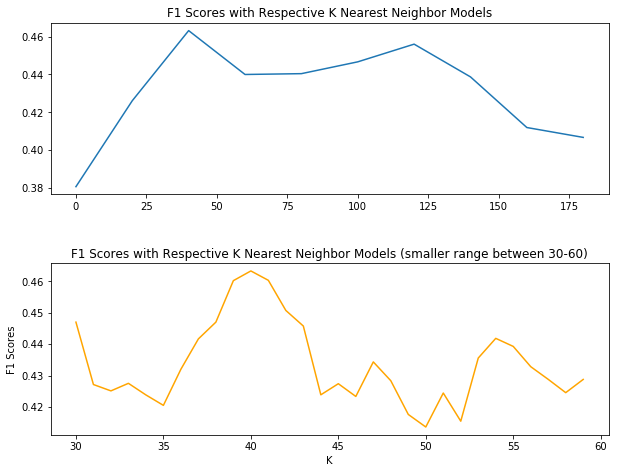

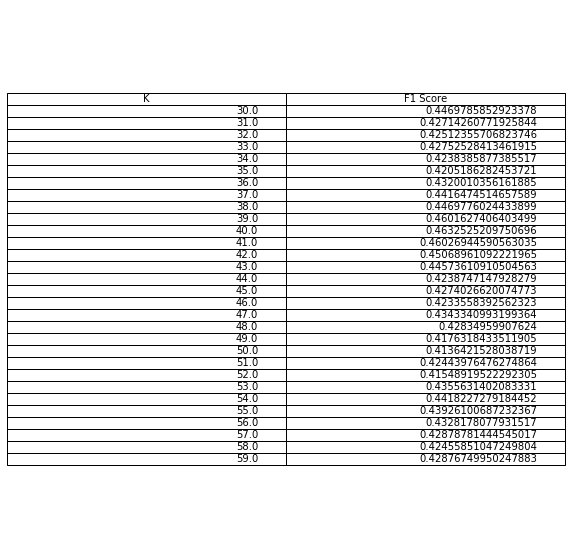

Multinomial Bayes Model


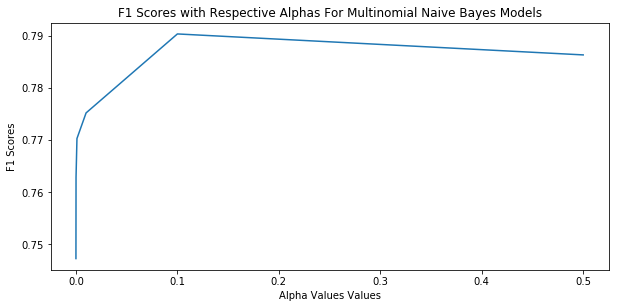

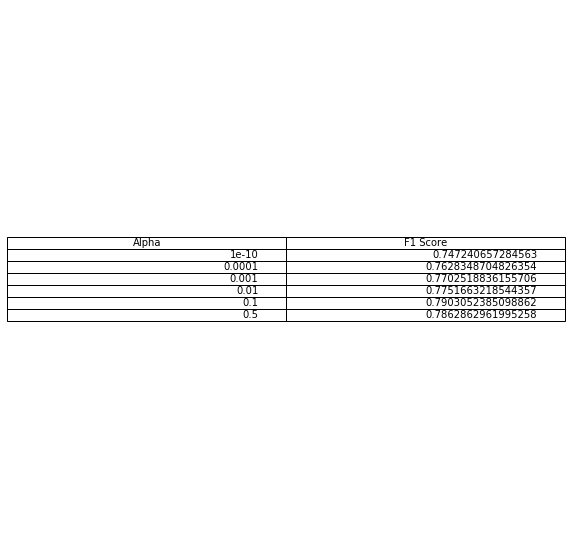

Logistic Regression Models

        C: 1e-10 F1-Score: 0.20641155283594254, 
        Sum of Square Weights Alt.Atheism:  5.706741834812684e-13
        Sum of Square Weights Comp.Graphics:  8.452994740316347e-13
        Sum of Square Weights Sci.Space:  4.040069813646816e-13
        Sum of Square Weights Talk.Religion.Misc:  6.358194840557199e-13

              


C:\Users\nmalboubi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



        C: 0.0001 F1-Score: 0.5416003218838589, 
        Sum of Square Weights Alt.Atheism:  0.007701749446752371
        Sum of Square Weights Comp.Graphics:  0.01194120031060656
        Sum of Square Weights Sci.Space:  0.009435076865639432
        Sum of Square Weights Talk.Religion.Misc:  0.009102835293831902

              

        C: 0.001 F1-Score: 0.6193046812006844, 
        Sum of Square Weights Alt.Atheism:  0.16509345166829434
        Sum of Square Weights Comp.Graphics:  0.20095274690581968
        Sum of Square Weights Sci.Space:  0.18067093754396832
        Sum of Square Weights Talk.Religion.Misc:  0.1872427843784905

              

        C: 0.01 F1-Score: 0.6646997417582748, 
        Sum of Square Weights Alt.Atheism:  2.541500299974652
        Sum of Square Weights Comp.Graphics:  2.939709368356389
        Sum of Square Weights Sci.Space:  2.862468819859332
        Sum of Square Weights Talk.Religion.Misc:  2.250028749596232

              

        C: 0.1 F1-Sco

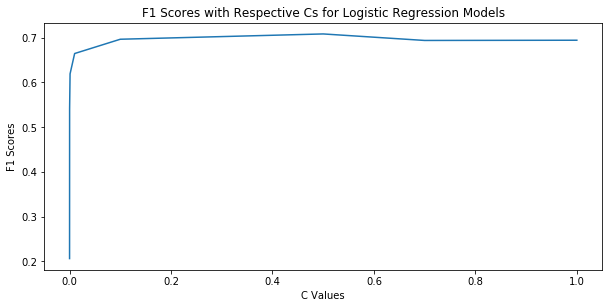

In [316]:
def P3():
    ### STUDENT START ###
    vectorize = CountVectorizer()
    #fit and transform training data
    train_a = vectorize.fit_transform(train_data)
    dev_a = vectorize.transform(dev_data)
    train_a.shape, dev_a.shape

    #choose our nearest neighbors model with size k

    #Choosing K Nearest Neighbors
    k = list(range(0,200, 20))
    y_list = []
    f1score_dict={}
    for i in k:
        model = KNeighborsClassifier(n_neighbors  = i+1)
        model.fit(train_a, train_labels)
        #fit our model and predict against dev data
        predicted_labels = model.predict(dev_a)
        f1score_dict[i] = metrics.f1_score(y_true = dev_labels, y_pred = predicted_labels, average='weighted')
        y_list.append(metrics.f1_score(y_true = dev_labels, y_pred = predicted_labels, average='weighted'))
    #first let's plot the f1scores and try to figure out where the max is. It looks like the max is around 40
    plt.figure(figsize=(10,12))

    axes = plt.subplot(3,1,1)
    plt.plot(k,y_list)
    plt.title("F1 Scores with Respective K Nearest Neighbor Models")


    # max(f1score_dict, key = f1score_dict.get)

    #let's now adjust our k such that we find the max somewhere between 30 and 60 
    k = list(range(30,60, 1))
    y_list = []
    f1score_dict={}
    for i in k:
        model = KNeighborsClassifier(n_neighbors  = i+1)
        model.fit(train_a, train_labels)
        #fit our model and predict against dev data
        predicted_labels = model.predict(dev_a)
        f1score_dict[i] = metrics.f1_score(y_true = dev_labels, y_pred = predicted_labels, average='weighted')
        y_list.append(metrics.f1_score(y_true = dev_labels, y_pred = predicted_labels, average='weighted'))
    #first let's plot the f1scores and try to figure out where the max is. It looks like the max is around 40
    plt.subplots_adjust(hspace=0.4)
    axes = plt.subplot(3,1,2)
    plt.plot(k,y_list, color = 'orange')
    plt.title("F1 Scores with Respective K Nearest Neighbor Models (smaller range between 30-60)")
    plt.xlabel("K")
    plt.ylabel("F1 Scores")
    print("F1 Scores for Various K Nearest Neighbors Models")

    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.axis('off')
    table2 = plt.table(cellText=np.array(list(f1score_dict.items())), 
                       colLabels=['K', 'F1 Score'],loc='center')
    plt.show()
    
    
#Naive Bayes  
    print("Multinomial Bayes Model")
    alpha = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5]
    y_list = []
    f1score_dict={}
    for i in alpha:
        model = MultinomialNB(alpha=i)
        model.fit(train_a, train_labels)
        #fit our model and predict against dev data
        predicted_labels = model.predict(dev_a)
        f1score_dict[i] = metrics.f1_score(y_true = dev_labels, y_pred = predicted_labels, average='weighted')
        y_list.append(metrics.f1_score(y_true = dev_labels, y_pred = predicted_labels, average='weighted'))
    #first let's plot the f1scores and try to figure out where the max is. It looks like the max is around 40
    plt.figure(figsize=(10,10))
    axes = plt.subplot(2,1,1)
    plt.plot(alpha,y_list)
    plt.title("F1 Scores with Respective Alphas For Multinomial Naive Bayes Models")
    plt.xlabel("Alpha Values Values")
    plt.ylabel("F1 Scores")
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.axis('off')
    table2 = plt.table(cellText=np.array(list(f1score_dict.items())), 
                       colLabels=['Alpha', 'F1 Score'],loc='center')
    plt.show()
    
    
#Logistic Regression
    print("Logistic Regression Models")
    c_values = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5,0.7,1]

    y_list = []
    f1score_dict={}
    for i in c_values:
        model = LogisticRegression(C=i, solver="liblinear", multi_class="auto")
        model.fit(train_a, train_labels)
        #fit our model and predict against dev data
        predicted_labels = model.predict(dev_a)
        print(f"""
        C: {i} F1-Score: {metrics.f1_score(y_true = dev_labels, y_pred = predicted_labels, average="weighted")}, 
        Sum of Square Weights Alt.Atheism:  {np.square(np.array(model.coef_)).sum(axis=1)[0]}
        Sum of Square Weights Comp.Graphics:  {np.square(np.array(model.coef_)).sum(axis=1)[1]}
        Sum of Square Weights Sci.Space:  {np.square(np.array(model.coef_)).sum(axis=1)[2]}
        Sum of Square Weights Talk.Religion.Misc:  {np.square(np.array(model.coef_)).sum(axis=1)[3]}

              """)

        y_list.append(metrics.f1_score(y_true = dev_labels, y_pred = predicted_labels, average='weighted'))
    #first let's plot the f1scores and try to figure out where the max is. It looks like the max is around 40
    plt.figure(figsize=(10,10))
    axes = plt.subplot(2,1,1)
    plt.plot(c_values,y_list)
    plt.title("F1 Scores with Respective Cs for Logistic Regression Models")
    plt.xlabel("C Values")
    plt.ylabel("F1 Scores")

    pd.DataFrame.from_dict(f1score_dict, orient='index').reset_index()
    # .rename(\
    #     columns = {'index': 'C', 0: 'F1-Score', 1: 'Sum of Squared Weights'})

    # newsgroups_train.target_names
pass
    
    ### STUDENT END ###

P3()



ANSWER: For K Nearest Neighbors, the F1 Score is optimized with K=40, with an F Score reaching 0.463. For the MultiNomial Naive Bayes models, the max F1 score was reached with alpha = 0.1, with an F1-score of 0.790. For a logistic regression model, as can be seen from the table above, the model that best optimizes the F1-Score has a C value of 0.5, with an F1-score of 0.708.

1) K Nearest Neighbors doesn't work well for this problem because of the low frequency of non zero features per example. From problem 2, non-zero entries made up 0.4% of entries in the matrix. Because of the low number of non-zero features, there is not enough information to create enough distance/variation between neighbors, and so new texts can easily be misclassified. It's difficult to have enough data to fill a feature space so large. 

2) Naive Bayes works well, especially when we can add a smoothing parameter, like alpha. The reason why it works well is because of two primary factors. One with smoothing, you can ensure that values that were not in the training set, but seen in the development data set have a non-zero probability. Furthermore, with Naive Bayes, you are calculating the probability of a feature given a certain class result, and certain words may be higher triggers in certain classes than others. For example, if the given topic is "Talk.Religion.Misc", the words "religion" and "spiritual" given this class, will most likely have higher probabilities in this class than the others, allowing for better classification. 

3) The logistic regression does not work as well as Naive Bayes and this is primarily due to sparseness of data in our feature set (there are very low numbers of non-zero features). Thus, in developing probabilities that each example should be assigned to may not be accurate given the sparseness of data in the features and the MLE estimate of the logistic model may suffer because of this. Furthermore, as we can see from the output above for Logistic Regression, as C becomes larger the sum of Squared weights also increases.

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

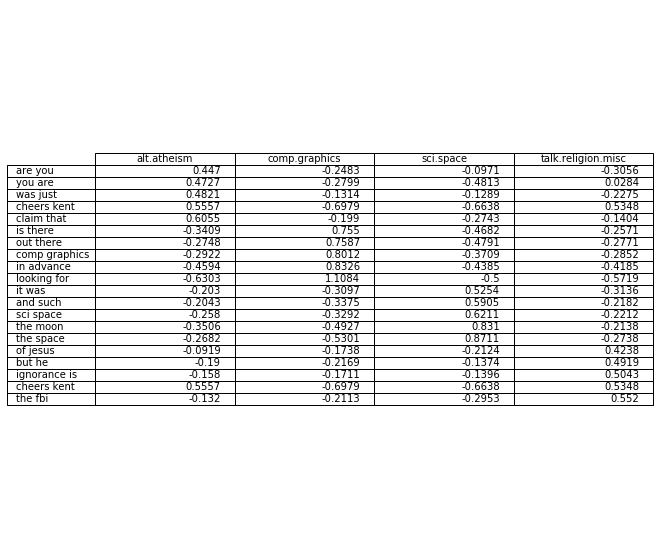

In [57]:
def P4():
    ### STUDENT START ###
    vectorizer3 = CountVectorizer(ngram_range = (2,2), analyzer = 'word')
    c = vectorizer3.fit_transform(train_data)
    model = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto") 
    model.fit(c, train_labels)
    features = []
    weight_list = []

    for i in range (model.coef_.shape[0]):
        #finding largest weights for each topic with np.argsort
        weight_index = np.argsort(model.coef_[i])[-5:]
        #adding the weights to the weight list
        weight_list += list(weight_index)
        #getting the list of feature names that correspond to the heaviest weights
        feature_names = np.array(vectorizer3.get_feature_names())[weight_index]
        #adding features to a list
        features += list(feature_names)

    total_weights=[]  
    for i in range(4):
        #pulling in the weights for each feature in each topic (4 topics)
        total_weights += list(model.coef_[i][weight_list])
    

    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.axis('off')
    table2 = plt.table(cellText=np.around(total_weights, decimals=4).reshape((20,4), order= 'F'),rowLabels=np.array(features), 
                       colLabels=newsgroups_train.target_names,loc='center')
    plt.show()


    
    ### STUDENT END ###

P4()

ANSWER: Yes, there are some surprising features in this table. "Cheers kent" shows up twice - once for the atheism topic and the talk.religion.misc topic. This can make sense given that there is most likely some religious overlap between the two groups. For Atheism, "are you" and "you are" have heavy weights, interesting because these are common conversational words. However, given the topic, these words probably relate to asking/answering the question of one's religious beliefs (i.e., "are you a Christian?", "You are a Muslim"). The heaviest weights are in the comp.graphics topic, as it would be rare to see these words in the other topics. Interestingly enough, however, the word: "looking for" has a very strong weight in the comp.graphics topic. Assuming that this would be the case, if individuals are "looking for" or searching for parts; however, given the ordinary use of these words, it's still surprising to see the large size of the weights for 'looking for'.

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [317]:
def nothing_str(s):
    return s


def better_preprocessor(s):
    ## STUDENT START ###
    #first put all words in lowercase
    s = s.lower()
    #Then remove all non-alpha numeric characters with a space
    s = re.sub('[^0-9a-zA-Z]+', ' ', s)
    # remove 'ing' from words
    s = re.sub('ing', '',s)
    #remove apostrophe s 
    s = re.sub(r"'s", '',s)
#   #replace multiple digits with 10
    s = re.sub("[0-9]{2,}", '10',s)
    #replace stop word "and"
    s = re.sub(r" and ", ' ', s)
    #replace stop word "or"
    s = re.sub(r" or ", ' ', s)
    #replace stop word "but"
    s = re.sub(r" but ", ' ', s)
    #replace stop word "the"
    s = re.sub(r" the ", ' ', s)
#   repalce stop word "a"
    s = re.sub(r" a ", ' ', s)
    #replace double spaces with one space
    s = re.sub(r'\s+', ' ', s)
    #remove all words longer than 5 
    s = re.sub("(\w{%d})\w+" % 5, "\\1", s)
    
    
    return s



    ### STUDENT END ###

def P5():
    ### STUDENT START ###
    vectorizer = CountVectorizer(preprocessor = nothing_str)
    train_a = vectorizer.fit_transform(train_data)
    dev_a = vectorizer.transform(dev_data)
    model = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto") 
    model.fit(train_a, train_labels)
    dev_predicted_labels = model.predict(dev_a)
    f1_nopre = metrics.f1_score(y_true=dev_labels, y_pred=dev_predicted_labels,average='weighted')
    print (f"""
    The F1 Score for a logistic regression with no preprocessing of text is {f1_nopre :.03f} 
    and the size of the dictionary is {train_a.shape[1] :,.0f}""")




    vectorizer2 = CountVectorizer(preprocessor = better_preprocessor)
    train_b = vectorizer2.fit_transform(train_data)
    dev_b = vectorizer2.transform(dev_data)
    model2 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto") 
    model2.fit(train_b, train_labels)
    dev_predicted_labels2 = model2.predict(dev_b)
    f1_pre = metrics.f1_score(y_true=dev_labels, y_pred=dev_predicted_labels2,average='weighted')
    vocab_change = train_b.shape[1] / train_a.shape[1] -1
    score_change = f1_pre / f1_nopre -1
    print (f"""
    The F1 Score for a logistic regression with preprocessing of text is {f1_pre :.3f} 
    and the size of the dictionary is {train_b.shape[1] :,.0f}""")
    print(f"""
    Vocabulary size change of {vocab_change: 0.2%}  and the F1-Score improvement is 
    {score_change : .2%}
    """)


    ### STUDENT END ###

P5()


    The F1 Score for a logistic regression with no preprocessing of text is 0.707 
    and the size of the dictionary is 33,291

    The F1 Score for a logistic regression with preprocessing of text is 0.723 
    and the size of the dictionary is 14,634

    Vocabulary size change of -56.04%  and the F1-Score improvement is 
     2.24%
    


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

C:\Users\nmalboubi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nmalboubi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\nmalboubi\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Using a logistic regression with L1 regularization, the F1 score is  0.683 and the vocabulary size is 26,879

    The number of nonzero features across all 4 topics after l1 regularization is 1,050. Using this new vocabulary,
    we then produced a logistic regression with an L2 regularization of 0.5. Summary of this model's performance is below

    Logistic Regression with L2 regularization = 0.5 based on the NEW (lower) vocabulary from the Logistic Regression with L1 regularization:
    F1 Score: 0.682
    

    Logistic Regression with L1 regularization = 0.01:
    L1 Regularization Strength: 0.01
    Vocabulary Size: 17
    F1 Score of Logistic Regression with L2 Regularization = 0.5:  0.465
    

    Logistic Regression with L1 regularization = 0.1:
    L1 Regularization Strength: 0.1
    Vocabulary Size: 213
    F1 Score of Logistic Regression with L2 Regularization = 0.5:  0.707
    

    Logistic Regression with L1 regularization = 1:
    L1 Regularization Strength: 1
    Voca

C:\Users\nmalboubi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nmalboubi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



    Logistic Regression with L2 regularization = 0.5 based on the FULL vocabulary is:
    F1 Score: 0.708
    Full Vocabulary Size: 26879
    


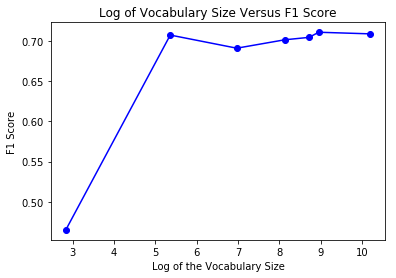

In [328]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    
    ### STUDENT START ###
    vectorizer = CountVectorizer()
    #transform training data
    train_a = vectorizer.fit_transform(train_data)
    features = np.array(vectorizer.get_feature_names())
    #transform development data
    dev_a = vectorizer.transform(dev_data)
    #fit l1 model 
    model = LogisticRegression(penalty = "l1")
    model.fit(train_a, train_labels)
    predicted_labels = model.predict(dev_a)
    score1 = metrics.f1_score(y_true = dev_labels, y_pred = predicted_labels, average='weighted')    

    print(f"Using a logistic regression with L1 regularization, the F1 score is {score1: 0.3f} and the vocabulary size is {train_a.shape[1]:,.0f}")


    #find weights of features that are zero across all four topics
    weights_sum  = np.sum(model.coef_, axis=0)
    #remove those coefficients/features that have zero weighting
    # nonzero_coef = model.coef_[weights_sum !=0]
    nonzerofeatures = features[weights_sum !=0]
    # # train_a.get_feature_names.shape



    #use the same vocabulary of nonzero features established above
    vectorizer2 = CountVectorizer(vocabulary = nonzerofeatures)
    #tranform the training and dev data with this new vocabulary
    train_b = vectorizer2.fit_transform(train_data)
    # features = vectorizer2.get_feature_names()
    dev_b = vectorizer2.transform(dev_data)


    model2 = LogisticRegression(penalty = "l2", C=0.5)
    model2.fit(train_b, train_labels)
    predicted_labels2 = model2.predict(dev_b)

    score2 = metrics.f1_score(y_true = dev_labels, y_pred = predicted_labels2, average='weighted')




    print(f"""
    The number of nonzero features across all 4 topics after l1 regularization is {train_b.shape[1]:,.0f}. Using this new vocabulary,
    we then produced a logistic regression with an L2 regularization of 0.5. Summary of this model's performance is below""")

    print(f"""
    Logistic Regression with L2 regularization = 0.5 based on the NEW (lower) vocabulary from the Logistic Regression with L1 regularization:
    F1 Score: {score2 :.3f}
    """)





    vocab_size = []
    f1score = []
    Cs = [ 0.01, 0.1, 1, 10 ,50, 100]
    for c in Cs:

        model3 = LogisticRegression(penalty = "l1", C=c, tol =0.015)
        model3.fit(train_a, train_labels)

        #train_c = vectorizer3.fit_transform(train_data)
        #Reduce the size of the vocabulary
        #find weights of features that are zero across all four topics
        weights_sum3  = np.sum(model3.coef_, axis=0)
    #     print(weights_sum3)

        nonzerofeatures = np.array(features)[weights_sum3 !=0]

        #train using L2
        vectorizer3 = CountVectorizer(vocabulary = nonzerofeatures)
        train_c = vectorizer3.fit_transform(train_data)
        dev_c = vectorizer3.transform(dev_data)

        #transform the training and dev data with this new vocabulary

        model4 = LogisticRegression(penalty ="l2", C=0.5)
        model4.fit(train_c, train_labels)
        predicted_labels4 = model4.predict(dev_c)
        score4 = metrics.f1_score(y_true = dev_labels, y_pred = predicted_labels4, average='weighted')

        f1score += [score4]

        vocab_size +=[np.log(len(np.array(nonzerofeatures)))]

        print(f"""
    Logistic Regression with L1 regularization = {c}:
    L1 Regularization Strength: {model3.C}
    Vocabulary Size: {len(nonzerofeatures):,.0f}
    F1 Score of Logistic Regression with L2 Regularization = 0.5: {score4: .3f}
    """)
    #     #remove those coefficients/features that have zero weighting
    # #       nonzero_coef = model3.coef_[weights_sum3 !=0]


    vectorizer4 = CountVectorizer()
    train_d = vectorizer4.fit_transform(train_data)
    dev_d = vectorizer4.transform(dev_data)

    model5 = LogisticRegression(penalty ="l2", C=0.5)
    model5.fit(train_d, train_labels)
    predicted_labels5 = model5.predict(dev_d)
    score5 = metrics.f1_score(y_true = dev_labels, y_pred = predicted_labels5, average='weighted')

    f1score += [score5]

    vocab_size +=[np.log(train_d.shape[1])]

    print(f"""
    Logistic Regression with L2 regularization = 0.5 based on the FULL vocabulary is:
    F1 Score: {score5 :.3f}
    Full Vocabulary Size: {train_d.shape[1]}
    """)


    plt.plot(vocab_size, f1score,color='blue', marker = 'o')
    plt.xlabel("Log of the Vocabulary Size")
    plt.ylabel ("F1 Score")
    plt.title("Log of Vocabulary Size Versus F1 Score")

P6()    


ANSWER: As the number of features in our data set (vocabulary) increase, the F1 score based on the development data also increases. The size of the vocabulary increases as C increases (C is the inverse of regularization strength so when C increases, it decreases the regularization strength, and as such, penalties are less for larger vocabulary sizes). However, at a certain threshold, the F1 score actually decreases, before slightly increasing and stabilizing. This indicates that vocabulary size can improve the fit of our model to a certain degree. After a certain point, it appears we may be over-fitting, or our feature set is large enough where we are being penalized for the additional features (so fit is not improving). The last point in the graph represents the F1 score derived from the full vocabulary. As one can notice, it is in line with the other f1 scores of the smaller vocabularies that had stronger regularization. In fact, when C=10, 50, or 100, the corresponding vocabulary sizes were 3,401, 6,115, and 7,752, and the corresponding F1 Scores were 0.701, 0.704, and 0.710, respectively. These F1 scores were in line with the F1 score of the model using the full vocabulary (0.708). Therefore, this indicates the full vocabulary is not required to achieve a good fit.


### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [342]:
def P7():
    ### STUDENT START ###
    #train data and come up with vocabulary 
    vectorizer = TfidfVectorizer()
    train_a = vectorizer.fit_transform(train_data)
    dev_a = vectorizer.transform(dev_data)

    model = LogisticRegression(C=100, solver = "liblinear", multi_class = 'auto')
    model.fit(train_a, train_labels)
    #Predict labels for transformed dev data
    predicted_labels = model.predict(dev_a)
    #Get predicted probabilities
    predicted_prob = model.predict_proba(dev_a)

    #getting size of dev_data set
    x = np.arange(predicted_prob.shape[0])


    R = np.amax(predicted_prob, axis=1) / np.array(predicted_prob)[x,dev_labels]

    R_index = np.argsort(R)[-3:]

    for i in R_index:
        print(f"""Document {i}
        Predicted Label: {newsgroups_train.target_names[predicted_labels[i]]}
        Actual Label: {newsgroups_train.target_names[dev_labels[i]]}
        R Ratio: {R[i]}

        Document: {dev_data[i]} 
        -----------------------------------------------------------------------------------------------------------------
        """)




        ### STUDENT END ###

P7()

Document 607
        Predicted Label: talk.religion.misc
        Actual Label: alt.atheism
        R Ratio: 287.1790654045373

        Document: 
The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...
 
        -----------------------------------------------------------------------------------------------------------------
        
Document 665
        Predicted Label: comp.graphics
        Actual Label: talk.religion.misc
        R Ratio: 325.00396157862025

        Document: Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible. 
        -----------------------------------------------------------------------------------------------------------------
        
Document 215
        Predicted Label: comp.graphics
        Actual Label: talk.religion.misc
        R Ratio: 929.3575250084375

        Document: I am pleased to a

ANSWER:

The R Ratio measures the  accuracy of our model. For each example it shows the highest predicted probability of a label divided by the probability measure of the correct label. If the prediction is correct, the maximum probability would equal the probability of the correct label, returning a value of 1. The largest R Ratios (those greater than 1) would suggest that the maximum predicted probability of a label was incorrect relative to the probability of the correct label. For example, if our model predicts with 90% probability that a document should be classified as "comp.graphics", but the actual label suggests that this should have been grouped under "talk.religion.music" (let's assume we predicted a probability of 9% for this label), the R ratio would be 90% / 9% = 10. Higher numbers indicate our model grossly missing the mark for accuracy, especially if the deviation between the max probability and the probability of the correct label is extremely large.

CountVectorizer() just counts how frequently a word appears in a document, whereas TFIDF measures the value of the word, by looking at how frequently it appears in the document and in the whole corpus. It will give less weight to words that appear frequently, such as 'the'.

Based on the examples above, I'm noticing two problems that would need to be addressed.

1) The model appears to miss-classify documents as graphics when they contain certain computer words such as "FTP". These computer graphics words, which are rare probably outside of conversations related to computer graphics, but can still happen in other conversations. We can see this in the 2nd and 3rd documents above, the text is misclassified as computer graphics because it contains the uncommon word 'FTP'. Although "The Book of Mormon" appears multiple times in this text, it is given less weight based on the frequency that it shows up in this document and the frequency in the whole corpus. 

2) The first document is misclassified as "Talk.Religion.Misc" whereas this should have been classified as "Atheism". These two topics have so many overlapping words so they can easily be misclassified.

A possible solution to fix issue number 1 is to remove from our dictionary, those computer graphics related words, such as "FTP", that appear frequently in the topics of computer graphics, but not exclusively in them. So for example, since "FTP" can show up in multiple topics, it may be better to exclude this word from the dictionary.

### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.